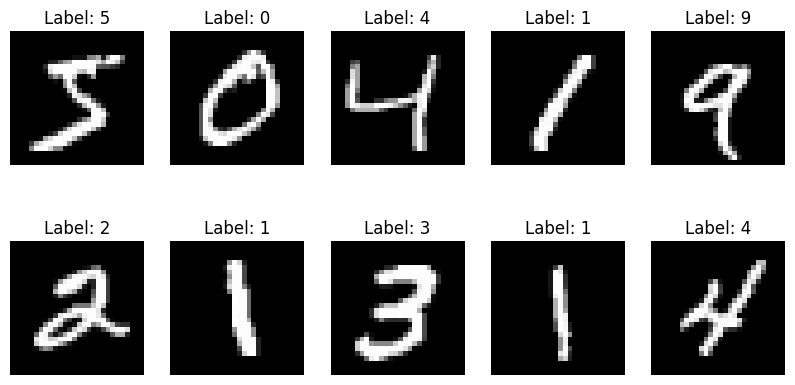

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load the AMIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to add a channel dimension (needed for CNN)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
histroy = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.1852 - accuracy: 0.9441 - val_loss: 0.0550 - val_accuracy: 0.9816
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0405 - val_accuracy: 0.9866
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 0.0286 - val_accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.0330 - val_accuracy: 0.9894
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0286 - accuracy: 0.9918
Test accuracy: 0.9918000102043152


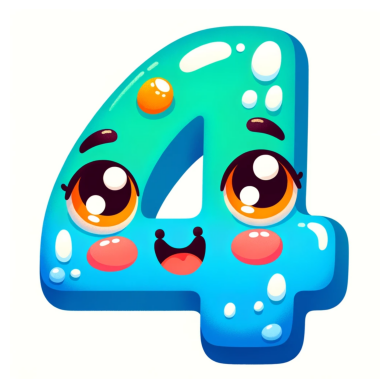

In [20]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

image_path = 'four.png'
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()

In [28]:
from PIL import Image
import numpy as np

def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img_array = np.array(img)
    img_array = img_array / 255.0  # Scale pixel values to [0, 1]
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for model input
    return img_array

image_path1 = 'four.png'
image_path2 = 'six.png'
image_path3 = 'eight.png'
processed_image1 = preprocess_image(image_path1)
processed_image2 = preprocess_image(image_path2)
processed_image3 = preprocess_image(image_path3)

In [32]:
predictions = model.predict(processed_image1)
predicted_digit = np.argmax(predictions[0])
print("Predicted digit:", predicted_digit)

predictions = model.predict(processed_image2)
predicted_digit = np.argmax(predictions[0])
print("Predicted digit:", predicted_digit)

predictions = model.predict(processed_image3)
predicted_digit = np.argmax(predictions[0])
print("Predicted digit:", predicted_digit)

1/1 [==============================] - 0s 22ms/step
Predicted digit: 3
1/1 [==============================] - 0s 19ms/step
Predicted digit: 6
1/1 [==============================] - 0s 19ms/step
Predicted digit: 8


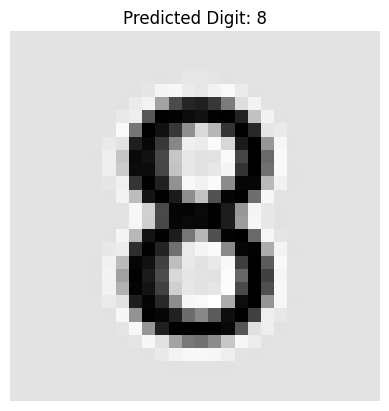

In [34]:
import matplotlib.pyplot as plt

plt.imshow(processed_image3.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.axis('off')
plt.show()

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()